In [177]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [178]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READ IN DATA!

In [181]:
full_file = pd.read_csv("billionaire_list_20yrs.csv")
full_file

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,358313,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,219780,1957,zygmunt_solorz_zak
352365,358314,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,207493,1957,zygmunt_solorz_zak
352366,358315,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,180887,1957,zygmunt_solorz_zak
352367,358316,Zygmunt Solorz-Zak,Solorz-Zak,65,M,2022,Poland-Warsaw,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,NaN,NaN,pol,74820000,231452,1957,zygmunt_solorz_zak


In [182]:
print(full_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

In [183]:
print(full_file.describe())

          Unnamed: 0            age           time  annual_income  \
count  352369.000000  352369.000000  352369.000000   3.523690e+05   
mean   179156.890498      72.130326    2014.227824   1.437315e+08   
std    103374.859481      13.237945       5.474610   2.336920e+08   
min         0.000000      19.000000    2002.000000   1.681350e+07   
25%     89515.000000      63.000000    2010.000000   4.870500e+07   
50%    178702.000000      72.000000    2015.000000   7.642500e+07   
75%    268734.000000      81.000000    2019.000000   1.396560e+08   
max    358317.000000     117.000000    2022.000000   5.650200e+09   

       daily_income     birth_year  
count  3.523690e+05  352369.000000  
mean   3.937844e+05    1949.869674  
std    6.402521e+05      13.237945  
min    4.606400e+04    1905.000000  
25%    1.334380e+05    1941.000000  
50%    2.093830e+05    1950.000000  
75%    3.826190e+05    1959.000000  
max    1.548000e+07    2003.000000  


MANIPULATE AND CLEAN DATA

Delete unnecessary columns


In [184]:
df = full_file.drop(['headquarters', 'state', 'name', 'last_name'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   age                    352369 non-null  int64 
 2   gender                 340477 non-null  object
 3   time                   352369 non-null  int64 
 4   permanent_country      304678 non-null  object
 5   company                326869 non-null  object
 6   main_industry          352369 non-null  object
 7   wealth_source_details  341447 non-null  object
 8   industry               352320 non-null  object
 9   countries              352369 non-null  object
 10  annual_income          352369 non-null  int64 
 11  daily_income           352369 non-null  int64 
 12  birth_year             352369 non-null  int64 
 13  name_cleaned           352369 non-null  object
dtypes: int64(6), object(8)
memory usage: 37.6+ MB
None


Fill in Nulls

In [185]:
#fill in missing genders
df['gender'] = df['gender'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')
df['wealth_source_details'] = df['wealth_source_details'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
#replace missing permanent_country with country
df['permanent_country'] = df['permanent_country'].fillna(df['countries'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   age                    352369 non-null  int64 
 2   gender                 352369 non-null  object
 3   time                   352369 non-null  int64 
 4   permanent_country      352369 non-null  object
 5   company                352369 non-null  object
 6   main_industry          352369 non-null  object
 7   wealth_source_details  352369 non-null  object
 8   industry               352369 non-null  object
 9   countries              352369 non-null  object
 10  annual_income          352369 non-null  int64 
 11  daily_income           352369 non-null  int64 
 12  birth_year             352369 non-null  int64 
 13  name_cleaned           352369 non-null  object
dtypes: int64(6), object(8)
memory usage: 37.6+ MB
None


ANALYZE DATA 


Total number of Billionaires over the last 20 years

In [186]:
#filter names by single entry

totalppl = df.name_cleaned.nunique()
print("The total number of billionaires in the last 20 years is", totalppl, "!!!")

The total number of billionaires in the last 20 years is 5014 !!!


In [187]:
#plot number billionaires each year- did they increase?



Top 10 Billionaires and their wealth over time

In [188]:
#sum the wealth of each, get top ten names
topten = df.groupby(['name_cleaned']).sum().drop(['age', 'daily_income', 'birth_year', 'Unnamed: 0', 'time'], axis=1)
ten = topten.nlargest((10),'annual_income')
ten

C:\Users\theal\AppData\Local\Temp\ipykernel_3268\3570486377.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topten = df.groupby(['name_cleaned']).sum().drop(['age', 'daily_income', 'birth_year', 'Unnamed: 0', 'time'], axis=1)


,annual_income
name_cleaned,
bill_gates,956388761979
warren_buffett,810449135958
carlos_slim_helu,694437722958
jeff_bezos,594087668958
bernard_arnault,582475634937
larry_ellison,559514780958
amancio_ortega,542367692937
jim_walton,416084003979
alice_walton,412401212979


In [189]:
#plot their wealth over the last 20 years, by passing names into list 
# show their industry?
#map_ten = ten.groupby(['time','annual_income'])
#map_ten.plot(kind='line')

#map_ten = df.groupby('time').annual_income
#sns.lineplot(data = map_ten)
#plt.show()

#mapten = pd.DataFrame(ten, columns=["name_cleaned", "time", "annual_income"])
#mapten.plot(x="time", y=["annual_income", "name_cleaned"], kind="line", figsize=(9, 8))
#mp.show()
#mapten = ten.drop(['Unnamed: 0', 'age', 'daily_income', 'birth_year'], axis=1)
#mapten.plot(label='ten', color=['orange', 'green'])



#by_industry = rich_df[rich_df['main_industry'].isin(ten)]
#tenppl = ten.drop(['Unnamed: 0', 'age', 'daily_income', 'birth_year'], axis=1)
#tenppl = if 'name_cleaned' == ["bill_gates", "warren_buffett", "carlos_slim_helu","jeff_bezos", "bernard_arnault", "larry_ellison",  "amancio_ortega", 
#"jim_walton", "alice_walton", "rob_walton"]

#grouped_ten = pd.pivot_table(tenppl, index = 'time', columns = 'name_cleaned', values = 'annual_income')
#grouped_ten.head(3)

Sum of All Wealth for Each Year

C:\Users\theal\AppData\Local\Temp\ipykernel_3268\2978983943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_total = df.groupby(['time']).sum()


Text(0.5, 1.0, 'Total Wealth of Billionaires Over Time')

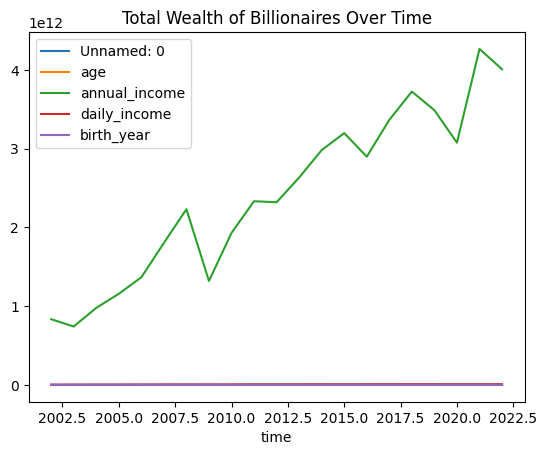

In [190]:
#filter data by years
yearly_total = df.groupby(['time']).sum()
yearly_total.plot(kind='line')
plt.title("Total Wealth of Billionaires Over Time")
#change x and y axis ticker increments
#change legend and what's graphed

Gender Data

In [191]:
#get unique names-- single instance of a person
##ppl = df.name_cleaned.unique
##print(ppl)
total = df.name_cleaned.unique()
#print the numbers
#print('Number of Male Billionaires: ', (df['gender'].value_counts()['M']))
#print('Number of Female Billionaires: ', (df['gender'].value_counts()['F']))
#print('Unknown Gender: ', (df['gender'].value_counts()['Unknown']))

#top industries per gender? 

In [192]:
#wealth comparisons by gender over time


Who is the youngest Billionaire? 
Answer: Kevin David Lehmann owns the leading drugstore chain in Germany.

In [193]:
df2 = df.drop(df.iloc[:, [0,3,5,8,9,11]],axis = 1)
ages = df2.groupby(['name_cleaned']).max()
youngest = ages.nlargest((1),'birth_year')
youngest

,age,gender,permanent_country,main_industry,wealth_source_details,annual_income,birth_year
name_cleaned,,,,,,,
kevin_david_lehmann,19,M,deu,Fashion & Retail,drugstores,87120000,2003


Average Annual Income by Age

<Axes: xlabel='age'>

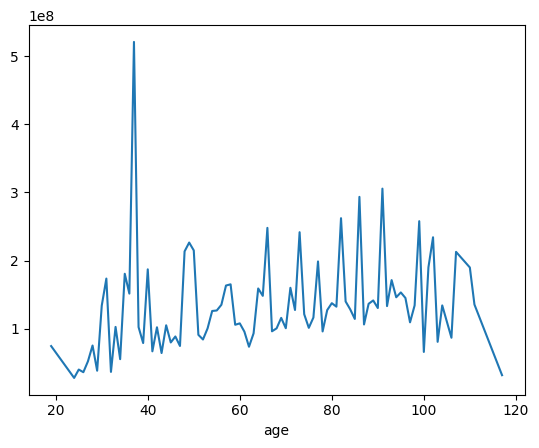

In [194]:
age_df = df.groupby('age').annual_income.mean()

#plot info
age_df.plot(kind='line')



Top 10 Industries of the Wealthy in the last 20 years

Text(0.5, 1.0, 'Top 10 Industries of the Wealthy in the last 20 years')

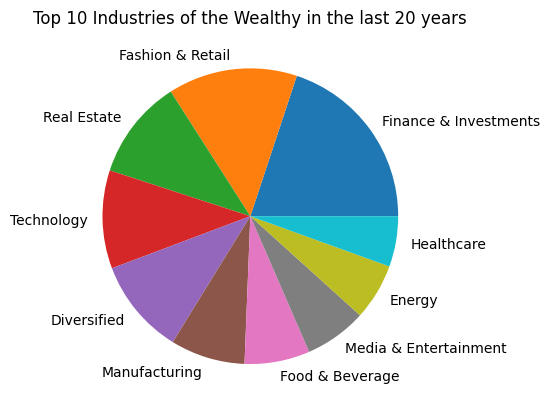

In [195]:
#grouped_by_industry = df.groupby('main_industry')
ind = df.main_industry.value_counts()
ind.head(10).plot(kind='pie')
plt.ylabel('')
plt.title("Top 10 Industries of the Wealthy in the last 20 years")